# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline


#counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
chipo.shape

(4622, 5)

### Step 5. Create a histogram of the top 5 items bought

In [5]:
# we map item name with quantity to get top 5 items bought

#1st we group items by their name

#sum()-gets the sum of the values for the requested axis.

# orderid should not be included for displaying histogram correctly

df1 = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head()

df1

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


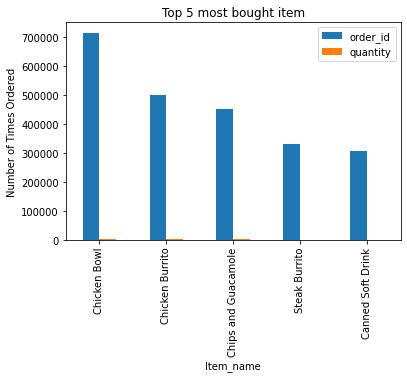

In [6]:
#when chipo is df then plot displays like this

# create the plot
df1.plot(kind='bar')


# Adding extra features    

plt.xlabel("Item_name")
plt.ylabel("Number of Times Ordered")
plt.title('Top 5 most bought item')
  
# Show plot
plt.show()


In [7]:
# Easier solution , when we convert chipo df to a numeric vriable df2. 
# this way plot display is correct

df2 = chipo.item_name.value_counts().head(5)

df2

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

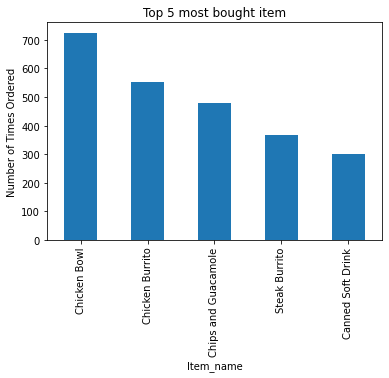

In [8]:

# create the plot
df2.plot(kind='bar')


# Adding extra features    

plt.xlabel("Item_name")
plt.ylabel("Number of Times Ordered")
plt.title('Top 5 most bought item')
  
# Show plot
plt.show()

In [9]:
# can also use a counter class to create a dictionary with keys(text) and frequency

Counter(chipo.item_name)

Counter({'Chips and Fresh Tomato Salsa': 110,
         'Izze': 20,
         'Nantucket Nectar': 27,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Chicken Bowl': 726,
         'Side of Chips': 101,
         'Steak Burrito': 368,
         'Steak Soft Tacos': 55,
         'Chips and Guacamole': 479,
         'Chicken Crispy Tacos': 47,
         'Chicken Soft Tacos': 115,
         'Chicken Burrito': 553,
         'Canned Soda': 104,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 59,
         'Carnitas Bowl': 68,
         'Bottled Water': 162,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Barbacoa Bowl': 66,
         'Chips': 211,
         'Chicken Salad Bowl': 110,
         'Steak Bowl': 211,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 95,
         'Veggie Bowl': 85,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Barbacoa Crispy Tacos': 11,
         'Veggie Salad Bowl': 1

In [10]:
# converting Counter to df

df3 = pd.DataFrame.from_dict(Counter(chipo.item_name), orient='index').reset_index()

df3.head()

,index,0
0,Chips and Fresh Tomato Salsa,110
1,Izze,20
2,Nantucket Nectar,27
3,Chips and Tomatillo-Green Chili Salsa,31
4,Chicken Bowl,726


In [11]:
# we sorf df3 over col[0] having quantity

df3 = df3.sort_values([0], ascending=False).head()

df3

,index,0
4,Chicken Bowl,726
11,Chicken Burrito,553
8,Chips and Guacamole,479
6,Steak Burrito,368
33,Canned Soft Drink,301


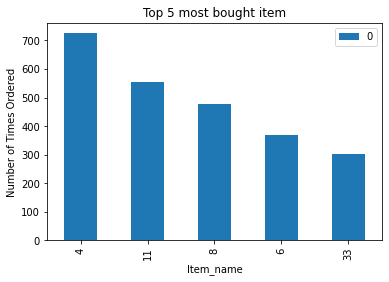

In [12]:
# create the plot
df3.plot(kind='bar')


# Adding extra features    

plt.xlabel("Item_name")
plt.ylabel("Number of Times Ordered")
plt.title('Top 5 most bought item')
  
# Show plot
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [13]:
chipo['item_price'] = pd.to_numeric(chipo.item_price.str.slice(1))

In [37]:
# group by order id, so that all same number order id's are added as group and their prices are added,
# check from original chipo df

df5 = chipo.groupby('order_id').sum()

df5

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [39]:
chipo.order_id.value_counts()

926     23
1483    14
205     12
1786    11
759     11
        ..
1593     1
1334     1
1100     1
1048     1
2        1
Name: order_id, Length: 1834, dtype: int64

In [23]:
df5.quantity.value_counts()

1     4355
2      224
3       28
4       10
8        1
5        1
10       1
7        1
15       1
Name: quantity, dtype: int64

In [25]:
df5.item_price.value_counts()


8.75     730
11.25    521
9.25     398
4.45     349
8.49     311
        ... 
4.36       1
13.35      1
22.20      1
32.94      1
15.00      1
Name: item_price, Length: 78, dtype: int64

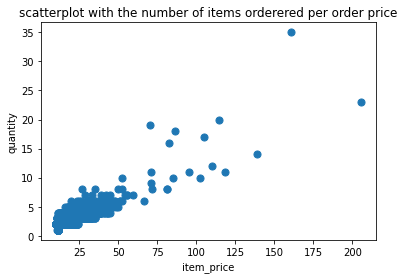

In [41]:
# Draw a scatter plot

df5.plot.scatter(x= 'item_price', y= 'quantity', s=50, title= "scatterplot with the number of items orderered per order price")

plt.show(block=True);

(0.0, 36.7)

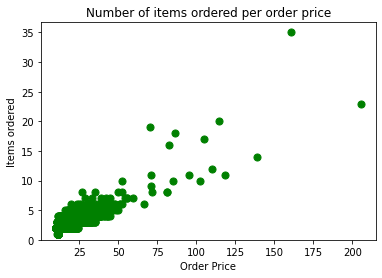

In [42]:
plt.scatter(x = df5.item_price, y = df5.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

In [46]:
# can we use counter for this problem

# Counter(chipo.item_price)  # this gives error as key value pair is item price and its frequency not the quantity

### Step 7. BONUS: Create a question and a graph to answer your own question.